
## 1.Introduction

This notebook was created for analysis and prediction making of the Car evaluation data set from UCI Machine Learning Library. The data set can be accessed separately from the UCI Machine Learning Repository page, [here](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).

## 2.Perform a classification empirical study

**a. The goal of the task**

The goal of the task is to predict the class_val column, which is car category based on given information. Therefore, a model can be build based on these information

**b. The dataset in terms of number of training examples, number of features, missing data, etc.**

Number of Training Examples: The number of training examples would depend on the size of the dataset. In the example this dataset provided, there are several rows of data, but it has many rows. The size of dataset depends on the number of instances or examples dataset have collected.

Number of Features: The number of features is the number of columns in the dataset used as input variables for the classification task. In this case, this dataset have 6 features:

- `class_val`: car category
- `buying`: buying price
- `maint`: price of the maintenance
- `doors`: number of doors
- `persons`: capacity in terms of persons to carry
- `lug_boot`: the size of luggage boot
- `safety`: estimated safety of the car

Missing Data: The code examples provided assume that the dataset does not have missing data. Also, there are lines of code in part checking missing value and duplicated rows to double check.

### 📊 Categorical Feature Ranges and Visualization

This section outlines the unique value ranges for each feature in the dataset and compares them through visualizations (e.g., pie charts).

It seems all features are necssary data in car evaluation model(by common sense). However, in machine learning phases, this question might be differ because of several aspect: relevance to problem, data exploration etc. The way to explore the attributes whether appear to influence the classification is not unique. For example, statics method(Hypothesis test) can be used to test whether the influence exist.

### ⚙️ Considerations on Feature Normalization

Although all features are categorical, this section briefly discusses whether normalization could improve performance and under what circumstances it would be appropriate.


buying: The "buying" feature has four possible values: 'vhigh,' 'high,' 'med,' and 'low.'

maint: The "maint" feature also has four possible values: 'vhigh,' 'high,' 'med,' and 'low.'

doors: The "doors" feature has four possible values: '2,' '3,' '4,' and '5more.'

persons: The "persons" feature has three possible values: '2,' '4,' and 'more.'

lug_boot: The "lug_boot" feature has three possible values: 'small,' 'med,' and 'big.'

safety: The "safety" feature also has three possible values: 'low,' 'med,' and 'high.'

class_val: The "class_val" feature represents the class labels and has four possible values: 'unacc,' 'acc,' 'good,' and 'vgood.'

There are some comparason and visualization of attribute ranges below. The attribute normalisation is crucial for the study because normalization is important in cases where the features have different scales or units, and the machine learning algorithm using in this scenario is sensitive to feature scales.

## Import libraries/packages

In [ ]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz
from graphviz import Source
from IPython.display import SVG

##################################

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression


In [ ]:
# Define the URL or file path where your data is located
data_url = 'https://raw.githubusercontent.com/RE9757/CSI4106/Assignment2/car.data'

# Define the column names
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_val']

# Read the data from the URL into a DataFrame
data = pd.read_csv(data_url, header=None, names=columns)

# Check the first few rows
print(data.head())

# Information
data.info()

  buying  maint doors persons lug_boot safety class_val
0  vhigh  vhigh     2       2    small    low     unacc
1  vhigh  vhigh     2       2    small    med     unacc
2  vhigh  vhigh     2       2    small   high     unacc
3  vhigh  vhigh     2       2      med    low     unacc
4  vhigh  vhigh     2       2      med    med     unacc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   object
 1   maint      1728 non-null   object
 2   doors      1728 non-null   object
 3   persons    1728 non-null   object
 4   lug_boot   1728 non-null   object
 5   safety     1728 non-null   object
 6   class_val  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
# Shape of the data set.
print("The data set has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

The data set has 1728 rows and 7 columns.


In [ ]:
# Check for missing values.
data.isna().any()

buying       False
maint        False
doors        False
persons      False
lug_boot     False
safety       False
class_val    False
dtype: bool

In [ ]:
# Check for duplicate rows.
data.duplicated().any()

False

In [ ]:
# Checking the values from each column.
for col in data.columns:
    print("Column:", col)
    print(data[col].value_counts(),'\n')

Column: buying
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64 

Column: maint
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64 

Column: doors
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 

Column: persons
2       576
4       576
more    576
Name: persons, dtype: int64 

Column: lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64 

Column: safety
low     576
med     576
high    576
Name: safety, dtype: int64 

Column: class_val
unacc    1210
acc       384
good       69
vgood      65
Name: class_val, dtype: int64 



In [ ]:
# Plotting the values of each column.
for i in data.columns:
    labels = data[i].unique()
    values = data[i].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=go.layout.Title(text='Value distribution for column: "{}"'.format(i),x=.5))
    fig.show()

## 3. Encode the features

Since the dataset consists entirely of categorical attributes, proper encoding is necessary before applying machine learning models. For Logistic Regression, which requires numerical input features, one-hot encoding was applied to transform the categorical data into binary format. This ensures compatibility with the model's expectations and helps preserve the semantic meaning of each category.

When using Naïve Bayes, the choice of encoding depends on the specific variant of the model. Although CategoricalNB is capable of handling raw categorical values directly, this project uses GaussianNB, which assumes that features are continuous and follow a Gaussian distribution. Therefore, one-hot encoding was also applied for this model, even though the resulting feature vectors do not strictly follow a normal distribution. In practice, GaussianNB can still operate effectively on such encoded data.

This encoding approach ensures both classifiers can be applied consistently across the same feature space, enabling a fair performance comparison.

In [ ]:

X = data.drop("class_val", axis=1)
y = data["class_val"]

class_type = CategoricalDtype(['unacc','acc','good','vgood'], ordered=True)

# One-hot encode the features
X_encoded = pd.get_dummies(X, drop_first=True)

# Printing the one-hot encoded data
print("\nOne-Hot Encoded Data:")
print(X_encoded.head())



One-Hot Encoded Data:
   buying_low  buying_med  buying_vhigh  maint_low  maint_med  maint_vhigh  \
0           0           0             1          0          0            1   
1           0           0             1          0          0            1   
2           0           0             1          0          0            1   
3           0           0             1          0          0            1   
4           0           0             1          0          0            1   

   doors_3  doors_4  doors_5more  persons_4  persons_more  lug_boot_med  \
0        0        0            0          0             0             0   
1        0        0            0          0             0             0   
2        0        0            0          0             0             0   
3        0        0            0          0             0             1   
4        0        0            0          0             0             1   

   lug_boot_small  safety_low  safety_med  
0            

##4. Define 2 models using some default parameters  
Two baseline classification models were defined using default or commonly used parameter settings from scikit-learn:


*   Logistic Regression: Initialized with a higher max_iter value to ensure convergence during training. Other parameters use default settings to serve as a performance baseline.
*   Gaussian Naïve Bayes: A standard GaussianNB model was used, assuming continuous input features. This aligns with the one-hot encoded feature representation applied in preprocessing.

These initial configurations serve as reference points for further model tuning and comparison in later stages of the study.

In [ ]:

from sklearn.naive_bayes import GaussianNB

# Define a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=10000)  # Setting a high iteration count to ensure convergence


# Define a Gaussian Naive Bayes model
gnb_model = GaussianNB()


##5. Train/test/evaluate your 2 models in cross-validation  
A 4-fold cross-validation strategy was used to evaluate both classifiers on the one-hot encoded dataset. To measure performance in this multi-class setting, both micro and macro precision/recall metrics were calculated.

Logistic Regression Results
*   Micro precision/recall: ~0.782
This indicates strong overall performance, as micro metrics account for the total number of true positives, false positives, and false negatives across all classes.

*   Macro precision/recall: ~0.530
These values reflect the model's average performance across individual classes, regardless of class size. The lower macro scores suggest that some minority classes were predicted less accurately.

Gaussian Naïve Bayes Results
*   Micro precision/recall: ~0.473
This shows significantly lower overall predictive accuracy compared to Logistic Regression.

*   Macro precision: ~0.359

*   Macro recall: ~0.626
While GaussianNB achieved relatively higher recall on some underrepresented classes, its precision remained low. This indicates that it predicted many false positives in certain categories, despite identifying many true positives.

Class Imbalance Consideration
The observed discrepancies between micro and macro metrics, particularly in the GaussianNB model, highlight the impact of class imbalance in the dataset. Micro scores are dominated by the most frequent classes, while macro metrics provide a clearer view of performance across all categories. Class imbalance was further confirmed by earlier visualizations in Part 1.

In [ ]:
from sklearn.model_selection import cross_val_score

# 4-fold cross-validation for Logistic Regression
log_reg_scores = cross_val_score(log_reg_model, X_encoded, y, cv=4, scoring='accuracy')

# 4-fold cross-validation for Gaussian Naive Bayes
gnb_scores = cross_val_score(gnb_model, X_encoded, y, cv=4, scoring='accuracy')

print("Logistic Regression CV Scores:", log_reg_scores)
print("GaussianNB CV Scores:", gnb_scores)

##############################################################################################
##############################################################################################


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, precision_score, recall_score

# Models were defined in the provided code: `log_reg_model` and `gnb_model`

# Generate predictions using 4-fold cross-validation
y_pred_log_reg = cross_val_predict(log_reg_model, X_encoded, y, cv=4)
y_pred_gnb = cross_val_predict(gnb_model, X_encoded, y, cv=4)

# Classification Reports
print("\nClassification Report for Logistic Regression:")
print(classification_report(y, y_pred_log_reg, target_names=['unacc', 'acc', 'good', 'vgood']))

print("\nClassification Report for GaussianNB:")
print(classification_report(y, y_pred_gnb, target_names=['unacc', 'acc', 'good', 'vgood']))

# Micro and Macro Precision and Recall
print("\nMicro and Macro Precision and Recall for Logistic Regression:")
print("Micro Precision:", precision_score(y, y_pred_log_reg, average='micro'))
print("Macro Precision:", precision_score(y, y_pred_log_reg, average='macro'))
print("Micro Recall:", recall_score(y, y_pred_log_reg, average='micro'))
print("Macro Recall:", recall_score(y, y_pred_log_reg, average='macro'))

print("\nMicro and Macro Precision and Recall for GaussianNB:")
print("Micro Precision:", precision_score(y, y_pred_gnb, average='micro'))
print("Macro Precision:", precision_score(y, y_pred_gnb, average='macro'))
print("Micro Recall:", recall_score(y, y_pred_gnb, average='micro'))
print("Macro Recall:", recall_score(y, y_pred_gnb, average='macro'))

# Discussing the balance of classes
class_counts = y.value_counts()
print("\nClass Distribution in the Dataset:")
print(class_counts)

balanced = all(count == class_counts.iloc[0] for count in class_counts)
if balanced:
    print("\nThe classes are balanced.")
else:
    print("\nThe classes are imbalanced.")


Logistic Regression CV Scores: [0.77546296 0.86574074 0.82407407 0.66203704]
GaussianNB CV Scores: [0.77083333 0.40277778 0.49768519 0.21990741]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       unacc       0.60      0.49      0.54       384
         acc       0.19      0.30      0.23        69
        good       0.90      0.92      0.91      1210
       vgood       0.43      0.40      0.41        65

    accuracy                           0.78      1728
   macro avg       0.53      0.53      0.52      1728
weighted avg       0.79      0.78      0.78      1728


Classification Report for GaussianNB:
              precision    recall  f1-score   support

       unacc       0.21      0.09      0.13       384
         acc       0.12      0.87      0.21        69
        good       0.90      0.54      0.68      1210
       vgood       0.21      1.00      0.34        65

    accuracy                           0.47      1728
   macr

##6. Parameter Tuning and Re-evaluation
To explore the effect of key hyperparameters on model performance, two alternative configurations were tested for each classification model, using the same 4-fold cross-validation strategy as in the baseline comparison.

For Logistic Regression, the first variation employed the 'sag' solver (Stochastic Average Gradient) with a regularization strength of C = 0.5, which applies stronger penalization to prevent overfitting. The second variation used the 'newton-cg' solver with C = 2, applying lighter regularization and using a second-order optimization method. Both variants maintained max_iter = 10000 to ensure convergence during training.

For Gaussian Naïve Bayes, the focus was on the var_smoothing parameter, which helps stabilize computations in the presence of small feature variances. Two configurations were tested: one with a higher smoothing value (1e-2), and one with a slightly lower value (1e-4) than the default. These adjustments control the influence of noise and variance sensitivity in the likelihood estimation process.

The performance of all variants was evaluated using 4-fold cross-validation to ensure consistency and comparability with baseline results. The goal was to assess whether these parameter changes could lead to measurable improvements or shifts in classification behavior across different class categories.

In [ ]:
# Changing the solver and regularization strength
log_reg_model_1 = LogisticRegression(solver='sag', C=0.5, max_iter=10000)
log_reg_scores_1 = cross_val_score(log_reg_model_1, X_encoded, y, cv=4, scoring='accuracy')
print("Modified Logistic Regression (sag, C=0.5) CV Scores:", log_reg_scores_1)

log_reg_model_2 = LogisticRegression(solver='newton-cg', C=2, max_iter=10000)
log_reg_scores_2 = cross_val_score(log_reg_model_2, X_encoded, y, cv=4, scoring='accuracy')
print("Modified Logistic Regression (newton-cg, C=2) CV Scores:", log_reg_scores_2)


Modified Logistic Regression (sag, C=0.5) CV Scores: [0.77083333 0.85185185 0.80092593 0.6712963 ]
Modified Logistic Regression (newton-cg, C=2) CV Scores: [0.78240741 0.8587963  0.83564815 0.66203704]


In [ ]:
# Changing the var_smoothing parameter
gnb_model_1 = GaussianNB(var_smoothing=1e-2)
gnb_scores_1 = cross_val_score(gnb_model_1, X_encoded, y, cv=4, scoring='accuracy')
print("Modified GaussianNB (var_smoothing=1e-2) CV Scores:", gnb_scores_1)

gnb_model_2 = GaussianNB(var_smoothing=1e-4)
gnb_scores_2 = cross_val_score(gnb_model_2, X_encoded, y, cv=4, scoring='accuracy')
print("Modified GaussianNB (var_smoothing=1e-4) CV Scores:", gnb_scores_2)


Modified GaussianNB (var_smoothing=1e-2) CV Scores: [0.76851852 0.44907407 0.49768519 0.23842593]
Modified GaussianNB (var_smoothing=1e-4) CV Scores: [0.76851852 0.40277778 0.49768519 0.21990741]


##7. Analyze the obtained results

**Average CV Scores:**

Logistic Regression models consistently outperform the GaussianNB models by a significant margin. Among the Logistic Regression models, the variant using the 'newton-cg' solver with C=2 has the highest CV score of 0.7847, which is only slightly better than the default Logistic Regression model with a score of 0.7818. The 'sag' solver with C=0.5 slightly underperforms the default setting, achieving a CV score of 0.7731.
The GaussianNB models lag considerably behind the Logistic Regression models in terms of CV scores. The variant with var_smoothing=1e-2 performs the best among the GaussianNB models with a score of 0.4884, followed closely by the default setting and the variant with var_smoothing=1e-4.

**Default Logistic Regression:**

The model exhibits strong performance for the 'good' category with high precision (0.90) and recall (0.92). This indicates that the model is adept at identifying and predicting this particular class.
For the 'unacc' category, the model's performance is moderate with a precision of 0.60 and recall of 0.49.
The 'vgood' and 'acc' categories present challenges. While the recall for 'acc' is fairly high at 0.30, the precision is quite low at 0.19. This suggests the model produces a substantial number of false positives for this category. Similarly, for 'vgood', the precision and recall are both around 0.40, indicating room for improvement.
The overall accuracy of the model is 0.78.

**Default GaussianNB:**

The GaussianNB model faces challenges across all categories. While it achieves a high precision of 0.90 for the 'good' category, its recall for the same is only 0.54, which indicates a large number of false negatives.
The 'vgood' category stands out with a recall of 1.00 but a precision of only 0.21, suggesting that while the model identifies all true 'vgood' instances, it also incorrectly classifies many instances into this category.
The 'unacc' category has low scores for both precision and recall, and the 'acc' category, though achieving a high recall of 0.87, has a low precision of 0.12.
The overall accuracy of the GaussianNB model is 0.47, substantially lower than the Logistic Regression model.

**Conclusions:**

Logistic Regression models are more suitable for this dataset, achieving higher CV scores and better classification metrics than the GaussianNB models.
While the Logistic Regression models perform exceptionally well for the 'good' category, they need improvement for the 'vgood' and 'acc' categories.
GaussianNB models, despite having some success in terms of recall for certain categories, struggle with precision across the board. The overall accuracy of these models is not competitive with that of Logistic Regression.

Average CV Scores:
Default Logistic Regression: 0.7818287037037037
Logistic Regression (sag, C=0.5): 0.7737268518518519
Logistic Regression (newton-cg, C=2): 0.7847222222222223
Default GaussianNB: 0.47280092592592593
GaussianNB (var_smoothing=1e-2): 0.48842592592592593
GaussianNB (var_smoothing=1e-4): 0.4722222222222222

Classification Report for Default Logistic Regression:
              precision    recall  f1-score   support

       unacc       0.60      0.49      0.54       384
         acc       0.19      0.30      0.23        69
        good       0.90      0.92      0.91      1210
       vgood       0.43      0.40      0.41        65

    accuracy                           0.78      1728
   macro avg       0.53      0.53      0.52      1728
weighted avg       0.79      0.78      0.78      1728


Classification Report for Default GaussianNB:
              precision    recall  f1-score   support

       unacc       0.21      0.09      0.13       384
         acc       0.12      0.

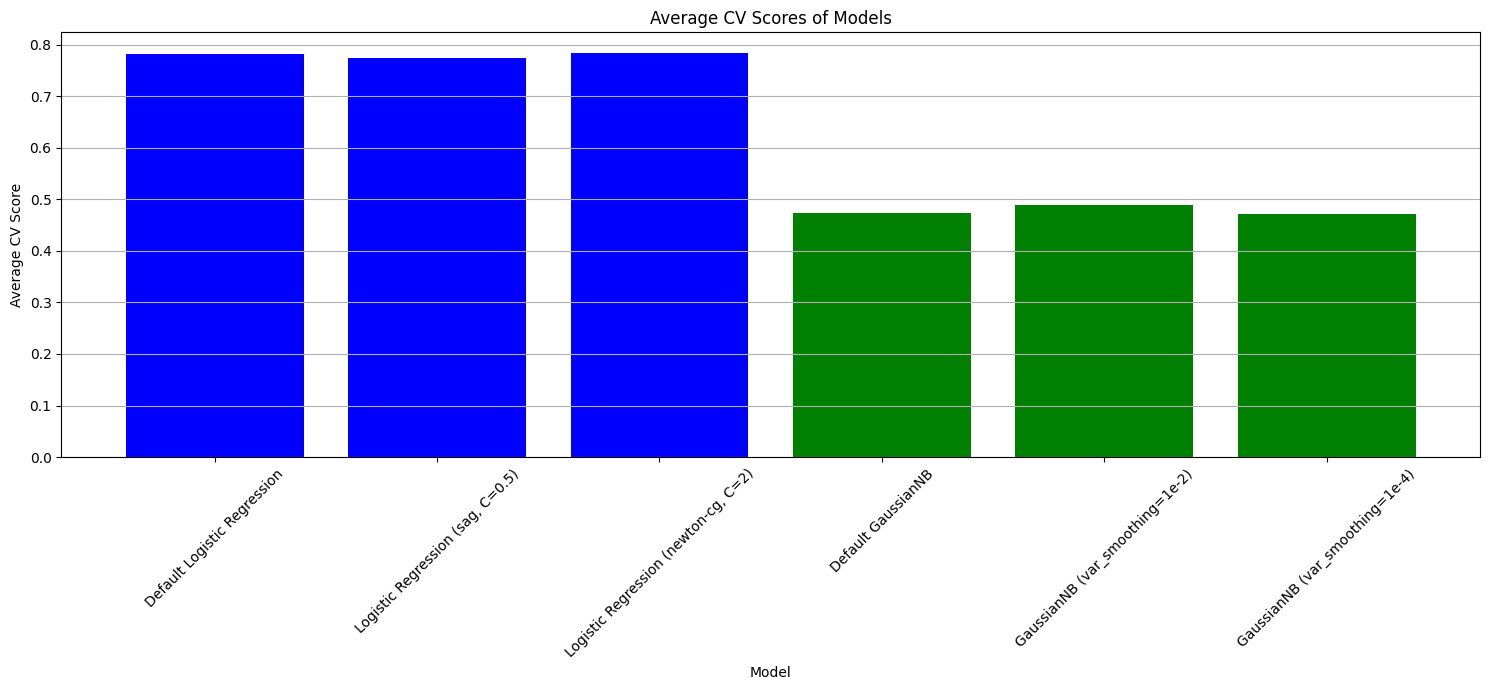

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Average CV Scores from models
cv_scores = {
    "Default Logistic Regression": np.mean(log_reg_scores),
    "Logistic Regression (sag, C=0.5)": np.mean(log_reg_scores_1),
    "Logistic Regression (newton-cg, C=2)": np.mean(log_reg_scores_2),
    "Default GaussianNB": np.mean(gnb_scores),
    "GaussianNB (var_smoothing=1e-2)": np.mean(gnb_scores_1),
    "GaussianNB (var_smoothing=1e-4)": np.mean(gnb_scores_2)
}

# Print Average CV Scores
print("Average CV Scores:")
for model, score in cv_scores.items():
    print(model + ":", score)

# Generate predictions using cross_val_predict for each model
y_pred_log_reg = cross_val_predict(log_reg_model, X_encoded, y, cv=4)
y_pred_gnb = cross_val_predict(gnb_model, X_encoded, y, cv=4)

# Print classification report for Default Logistic Regression
print("\nClassification Report for Default Logistic Regression:")
print(classification_report(y, y_pred_log_reg, target_names=class_type.categories))

# Print classification report for Default GaussianNB
print("\nClassification Report for Default GaussianNB:")
print(classification_report(y, y_pred_gnb, target_names=class_type.categories))

# Visualization of the results using a bar graph
plt.figure(figsize=(15, 7))
plt.bar(cv_scores.keys(), cv_scores.values(), color=['blue', 'blue', 'blue', 'green', 'green', 'green'])

# Labels, title, and other aesthetics
plt.ylabel('Average CV Score')
plt.xlabel('Model')
plt.title('Average CV Scores of Models')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the graph
plt.tight_layout()
plt.show()


##Reference:

The machine learning pipeline for the car-evaluation dataset was implemented using **Python's Scikit-learn library**. In the analysis:

1. Data Preprocessing: Categorical variables were encoded using one-hot encoding to transform them into a format suitable for machine learning algorithms.

2. Model Training and Evaluation:

**Logistic Regression:** This model is a linear classifier often used for binary and multiclass classification problems. It predicts the probability that a given instance belongs to a particular category.


*   **LogisticRegression():** The default model.
*   **LogisticRegression(solver='sag', C=0.5):** An instance with the 'sag' solver and regularization strength C set to 0.5.
*   **LogisticRegression(solver='newton-cg', C=2):** Another variant using the 'newton-cg' solver and C set to 2.


**GaussianNB:** This model is based on Bayes' theorem and assumes that the value of a particular feature is independent of the value of any other feature for a given class variable. The GaussianNB model assumes that the features follow a Gaussian distribution.

*   **GaussianNB():** The default model.
*   **GaussianNB(var_smoothing=1e-2):** An instance where the variance smoothing parameter is set to 1e-2.
*   **GaussianNB(var_smoothing=1e-4):** An instance where the variance smoothing parameter is set to 1e-4.

**Cross-Validation:**

The models were evaluated using 4-fold cross-validation to estimate their generalization performance. The cross_val_score method from Scikit-learn was used to compute the average CV scores for each model.
Model Performance Metrics:

The classification reports showcase the precision, recall, f1-score, and support for each class, as well as the overall accuracy of the models. These metrics provide a comprehensive view of the model's strengths and weaknesses for each class category.